# Grab Models from File


In [2]:
import pickle
loaded_net = pickle.load(open('neuralNetGL3'+".sav", 'rb'))
loaded_lin = pickle.load(open('linearRegGL3'+".sav", 'rb'))

# Get Data from CSV


In [3]:
import pandas as pd
import numpy as np
dataFrame = pd.read_csv("dataGL3.csv")

C:\Users\adamp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
sample = dataFrame.sample(frac = .01)
sample

,X,Y,W,H,LPX,LPY,LPZ,RPX,RPY,RPZ
73618,262.6804880507597,153.92118287395863,115.06112066578227,55.134287122491585,3.12877979843,0.0,-26.6681337602,11.3787797984,-0.0125,-26.6681337602
50390,237.957,139.326,207.445,94.6849,-0.401503,0,-13.8374,7.8485,-0.0125,-13.8374
16294,147.704,105.3,154.618,78.6791,-5.80898,0,-18.9652,2.44102,-0.0125,-18.9652
53083,188.218,125.301,146.857,72.1229,-1.78985,0,-20.4729,6.46015,-0.0125,-20.4729
77548,243.28950919591628,137.2199745033296,217.37678149051888,106.02393618045824,-0.0856348770067,0.0,-13.3873219166,8.16436512299,-0.0125,-13.3873219166
106981,166.83789645898162,118.23072276017115,139.72090143723008,64.15594476184982,-3.81971298939,0.0,-21.5565727972,4.43028701061,-0.0125,-21.5565727972
13543,146.904,103.926,131.396,67.9948,-4.91387,0,-20.3395,3.33613,-0.0125,-20.3395
124695,168.21609556302235,110.14538051756395,185.93029281640278,92.40327523328816,-3.47567202366,0.0,-16.1484006115,4.77432797634,-0.0125,-16.1484006115
100211,261.6552235032657,153.28621217657349,185.5107571270639,89.56756102864924,1.23398816867,0.0,-15.8469935791,9.48398816867,-0.0125,-15.8469935791
81814,178.04711746907398,108.2433297570006,185.81012319947246,92.21688202958289,-3.43779878249,0.0,-16.1810405367,4.81220121751,-0.0125,-16.1810405367


In [5]:
input_layer = sample[['X','Y',"W","H"]]

In [6]:
from sklearn.neural_network import MLPRegressor
import math
##In order: LPX , RPX, LPY, LPZ
def getNeuralNet(x):
    data =  loaded_net.predict([x])[0]
    centerX = (data[0] + data[1])/2.0
    angle = 90 - np.arctan2((abs(data[3].item())),centerX)*180/3.14
    plotThing(centerX, angle, data[3].item())
    #print(angle)
    #print("Angle: ", (90-angle), " Degrees")
    

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
#fig = plt.subplots(nrows = 1, ncols = 2)
plt.subplot(2,1,1)
plt.ylabel('X Values')
plt.xlabel('Angle in Degrees')
plt.axis("auto")

plt.subplot(2,1,2)
plt.ylabel('Z Values')
plt.xlabel('Angle in Degrees')
plt.axis("auto")


def plotThing(centerX, angle, z):
    plt.subplot(2,1,1)
    plt.plot(angle,centerX, ',')
    plt.subplot(2,1,2)
    plt.plot(angle, z, ",")

In [8]:
input_layer.apply(lambda x: getNeuralNet(x), axis =1);

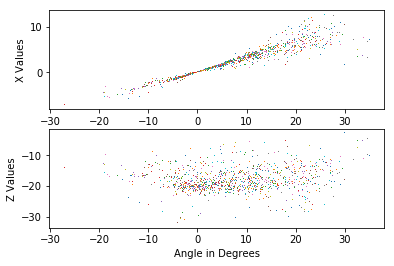

In [9]:
fig